# Sentiment Analysis of the Hands Hygiene Course of the Platform

Author : Axel Daniel Malváez Flores  
Version : 1.0.0

This notebook contains the code to perform the sentiment analysis of the Hands Hygiene Course of the Platform.

In [10]:
# Main libraries we will use to make the preprocessing and the
# sentiment analysis
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style('darkgrid')

## Preprocessing

The following table contains all the opinions we need, nonetheless this table has the three following : names, title of the opininon and the opinion, so we will only get the opinions.

In [11]:
opinions = pd.read_csv('../Data/opiniones.csv')
opinions

,OPINIONES
0,Reyna María del Carmen Ledezma Uribe
1,Curso de Higiene de Manos
2,"Esta muy completo, con profesionales muy capac..."
3,Victor Toxqui Tlachino
4,Higiene de manos
...,...
2359,CURSO DE LAVADO DE MANOS
2360,"EXCELENTE CURSO, CONFUSO EL EXAMEN FINAL, RECO..."
2361,Celyzeth Puentes Aguilar
2362,Higiene De Manos


We know that the opinions are in each three rows, so we will get the opinions by getting the rows each three.

In [12]:
# List that contains the number where the opinions are located
number_ops = [2+(3*x) for x in range(788)]

#List with the opinions only
opinions_only = list([opinions.iloc[x]['OPINIONES'] for x in number_ops])
print(f'Number of opinions: {len(opinions_only)}')

Number of opinions: 788


In [13]:
counter = 0
idx = []

for opinion in opinions_only:
    if opinion == 'not specified' or opinion == '.' or opinion == '😁' or opinion == '100' or opinion == ':)':
        idx.append(counter)
    counter += 1

opinions_only = [opinions_only[x] for x in range(len(opinions_only)) if x not in idx]

In [14]:
import re
from unidecode import unidecode
from deep_translator import GoogleTranslator

opinions_cleaned = []

counter = 0
try:
    for opinion in opinions_only:
        opinion = GoogleTranslator(source='es', target='en').translate(opinion)
        opinion = unidecode(opinion)
        opinion = opinion.lower()
        # Remove punctuation
        opinion = re.sub(r'[^\w\s]', '', opinion)
        opinions_cleaned.append(opinion)
        counter += 1
except:
    print(f'Error in {counter}')

Error in 225


In [15]:
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop_words = stopwords.words('english')

for i in range(len(opinions_cleaned)):
    opinions_cleaned[i] = ' '.join([word for word in opinions_cleaned[i].split() if word not in stop_words])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
opinions_cleaned

['complete highly trained professionals',
 'excellent course taught health professionals since basic protection measure must follow workplace avoid transmission pathogens thank speakers sharing knowledge course presentations excellent quality',
 'thank helping continue updating us health professionals always forefront',
 'excellent course learn andor confirm knowledge importantly strategies recommend continue working great program patients therefore us healthcare personnel thank much',
 'would think know everything wash hands however course realize perhaps everything taken granted highly recommended',
 'excellent work speakers dedication time expand knowledge',
 'excellent course hand hygiene information provided accurate',
 'good',
 'well',
 'course complete',
 'excellent',
 'information provided good uptodate',
 'good course',
 'excellent presentation',
 'well',
 'excelete',
 'good course',
 'excellent course remind us importance correct hand hygiene order reduce mechanism transmissi

In [17]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

for review in opinions_cleaned:
    sentiment = sia.polarity_scores(review)
    polarity_score = sentiment['compound']
    
    print(f"Reseña: {review}")
    print(f"Puntaje de polaridad: {polarity_score}")
    print()

Reseña: complete highly trained professionals
Puntaje de polaridad: 0.0

Reseña: excellent course taught health professionals since basic protection measure must follow workplace avoid transmission pathogens thank speakers sharing knowledge course presentations excellent quality
Puntaje de polaridad: 0.8885

Reseña: thank helping continue updating us health professionals always forefront
Puntaje de polaridad: 0.5719

Reseña: excellent course learn andor confirm knowledge importantly strategies recommend continue working great program patients therefore us healthcare personnel thank much
Puntaje de polaridad: 0.9337

Reseña: would think know everything wash hands however course realize perhaps everything taken granted highly recommended
Puntaje de polaridad: 0.4754

Reseña: excellent work speakers dedication time expand knowledge
Puntaje de polaridad: 0.7184

Reseña: excellent course hand hygiene information provided accurate
Puntaje de polaridad: 0.7845

Reseña: good
Puntaje de polarid

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/danielmalvaez/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


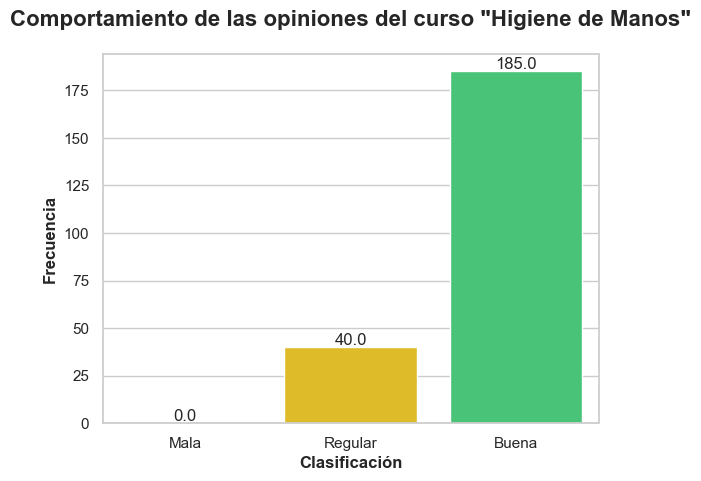

In [21]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

# Obtener los puntajes de polaridad de las reseñas
polarity_scores = [sia.polarity_scores(review)['compound'] for review in opinions_cleaned]

# Definir los límites y las etiquetas de los rangos
rangos = np.linspace(-1,1, 4)
etiquetas = ['Mala', 'Regular', 'Buena']

# Dividir los puntajes de polaridad en los rangos especificados
polarity_ranges = pd.cut(polarity_scores, bins=rangos, labels=etiquetas)

# Colores personalizados
colores = ['#FC540B', '#FCCD0B', '#35D773']

# Configurar el estilo y la paleta de colores
sns.set(style='whitegrid')
sns.set_palette(colores)

# Crear el countplot
ax = sns.countplot(x=polarity_ranges)

# Agregar los números en las barras
for p in ax.patches:
    ax.annotate(format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Configurar los ejes y el título
plt.xlabel('Clasificación', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.ylabel('Frecuencia', fontweight='bold', labelpad=4, fontfamily='Arial')
plt.title('Comportamiento de las opiniones del curso "Higiene de Manos"', fontsize=16, fontweight='bold', pad=20, loc='center', fontfamily='Arial')
#plt.yscale('log')

# Mostrar el gráfico
plt.savefig('Opiniones.png', dpi=300, bbox_inches='tight', format="png")
plt.show()

In [22]:
polarity_ranges

['Regular', 'Buena', 'Buena', 'Buena', 'Buena', ..., 'Buena', 'Buena', 'Regular', 'Buena', 'Buena']
Length: 225
Categories (3, object): ['Mala' < 'Regular' < 'Buena']

In [ ]:
opinions_only[3]

'Excelente curso para aprender, y/o confirmar nuestros conocimientos, y lo más importante las estrategias que recomiendan para continuar trabajando por este gran programa en pro de nuestr@s pacientes y por ende de nosotr@s como personal sanitario. Muchas gracias 😃👋👍'

In [33]:
polarity_ranges

['Regular', 'Buena', 'Buena', 'Buena', 'Buena', ..., 'Buena', 'Buena', 'Regular', 'Buena', 'Buena']
Length: 225
Categories (3, object): ['Mala' < 'Regular' < 'Buena']

In [41]:
buena_index = -1
regular_index = -1
mala_index = -1

counter = 0
for i in range(len(polarity_ranges)):
    if polarity_ranges[i] == 'Buena':
        buena_index = i
        counter +=1
    if polarity_ranges[i] == 'Regular':
        regular_index = i
        counter +=1
    if polarity_ranges[i] == 'Mala':
        mala_index = i
        counter +=1
    if counter == 3:
        break
    
idx = [buena_index, regular_index, mala_index]
for i in idx:
    if i != -1:
        print(opinions_only[i])

In [ ]:
#!pip install reportlab

In [ ]:
from reportlab.lib.pagesizes import letter
from reportlab.lib import colors
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

# Create a PDF file
pdf_path = "my_report.pdf"
doc = SimpleDocTemplate(pdf_path, pagesize=letter)

# Create a list to hold the story (elements to be added to the PDF)
story = []

# Define styles
styles = getSampleStyleSheet()
normal_style = styles["Normal"]
title_style = styles["Title"]

# Add a title to the PDF
title = Paragraph("My Report", title_style)
story.append(title)
story.append(Spacer(1, 12))

# Add content to the PDF
content = """
This is a sample report generated with reportlab.
You can include text, images, and other elements in your report.
"""
content_paragraph = Paragraph(content, normal_style)
story.append(content_paragraph)
story.append(Spacer(1, 12))


original_width = 640
original_height = 480
scale_factor = 0.5

new_width = int(original_width * scale_factor)
new_height = int(original_height * scale_factor)

# Add an image to the PDF
image = Image("Opiniones.png", width=new_width, height=new_height)
story.append(image)

# Build the PDF
doc.build(story)

print(f"PDF generated at: {pdf_path}")

PDF generated at: my_report.pdf
